In [64]:
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm 
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets,linear_model,metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

In [65]:
data=pd.read_excel("C:/Users/sudarson.SUDARSON/Downloads/rocket.xlsx")
#data=pd.read_csv("https://docs.google.com/spreadsheets/d/18mzp6f9xZm0J4rfoAuJ_Xu-gzVDjjkc1oMTMW10QGEQ/edit?usp=sharing")

In [66]:
data.head()

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8,On,L,5
1,Kevin,kevin,23.0,16.0,B,U,8,On,L,5
2,Kevin,RR,NaN,18.0,A,L,10,On,R,6
3,Priya,Nithya,27.0,20.0,A,U,10,On,R,4
4,Priya,Priya,29.5,17.5,B,U,5,Off,R,8


In [67]:
data.describe()

,Length,Breadth,Foldings,Distance
count,71.000000,88.000000,88.000000,88.000000
mean,26.708451,18.500000,8.136364,6.090909
std,11.920268,1.339068,1.736570,1.974762
min,0.000000,16.000000,5.000000,1.000000
25%,22.500000,17.500000,8.000000,5.000000
50%,28.500000,18.500000,8.000000,6.000000
75%,29.500000,20.000000,10.000000,7.000000
max,98.000000,20.500000,10.000000,11.000000


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person           88 non-null     object 
 1   Item_Identifier  88 non-null     object 
 2   Length           71 non-null     float64
 3   Breadth          88 non-null     float64
 4   PaperQuality     80 non-null     object 
 5   Angle            84 non-null     object 
 6   Foldings         88 non-null     int64  
 7   Windspeed        88 non-null     object 
 8   Dominanthand     88 non-null     object 
 9   Distance         88 non-null     int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 7.0+ KB


In [69]:
data.isnull().sum()

Person              0
Item_Identifier     0
Length             17
Breadth             0
PaperQuality        8
Angle               4
Foldings            0
Windspeed           0
Dominanthand        0
Distance            0
dtype: int64

In [70]:
data.PaperQuality.unique()



array(['A', 'B', nan], dtype=object)

In [71]:
data.PaperQuality.fillna(data.PaperQuality.mode().max(),inplace=True)

In [72]:
data.Angle.unique()


array(['U', 'L', nan], dtype=object)

In [73]:
data.Angle.fillna(data.Angle.mode().max(),inplace=True)

In [74]:
data.Length.unique()


array([29. , 23. ,  nan, 27. , 29.5, 30. , 25. ,  2. , 21. , 67. , 29.6,
       28.5, 98. , 22. , 20. ,  0. ,  3. ])

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length'>

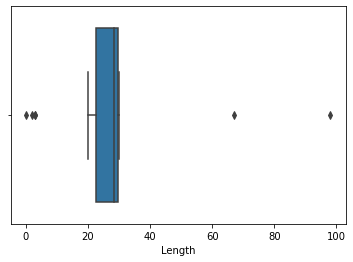

In [75]:
sns.boxplot(data.Length)


In [76]:
data.Length.fillna(data.Length.median(),inplace=True)

In [77]:
y=data.Distance
x=data.iloc[0:,[2,3,4,5,6,7,8]]
x1=data.iloc[0:,[2,3]]
x2=data.iloc[0:,[4,5,6,7,8]]

In [78]:
x.head()

,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand
0,29.0,20.0,A,U,8,On,L
1,23.0,16.0,B,U,8,On,L
2,28.5,18.0,A,L,10,On,R
3,27.0,20.0,A,U,10,On,R
4,29.5,17.5,B,U,5,Off,R


In [79]:
x1.head()

,Length,Breadth
0,29.0,20.0
1,23.0,16.0
2,28.5,18.0
3,27.0,20.0
4,29.5,17.5


In [80]:
x2.head()

,PaperQuality,Angle,Foldings,Windspeed,Dominanthand
0,A,U,8,On,L
1,B,U,8,On,L
2,A,L,10,On,R
3,A,U,10,On,R
4,B,U,5,Off,R


In [81]:
trainx,testx = train_test_split(x,test_size = 0.2)
trainy,testy = train_test_split(y,test_size = 0.2)

In [82]:
dummy=pd.get_dummies(x,columns=["Foldings","PaperQuality","Angle","Foldings","Windspeed","Dominanthand"])

In [83]:
dummy

,Length,Breadth,Foldings_5,Foldings_8,Foldings_10,PaperQuality_A,PaperQuality_B,Angle_L,Angle_U,Foldings_5,Foldings_8,Foldings_10,Windspeed_Off,Windspeed_On,Dominanthand_L,Dominanthand_R
0,29.0,20.0,0,1,0,1,0,0,1,0,1,0,0,1,1,0
1,23.0,16.0,0,1,0,0,1,0,1,0,1,0,0,1,1,0
2,28.5,18.0,0,0,1,1,0,1,0,0,0,1,0,1,0,1
3,27.0,20.0,0,0,1,1,0,0,1,0,0,1,0,1,0,1
4,29.5,17.5,1,0,0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,29.5,17.5,1,0,0,0,1,0,1,1,0,0,1,0,0,1
84,28.5,18.5,1,0,0,0,1,1,0,1,0,0,1,0,0,1
85,30.0,19.0,0,1,0,0,1,0,1,0,1,0,1,0,0,1
86,25.0,17.0,0,1,0,0,1,0,1,0,1,0,0,1,0,1


In [84]:
scaler=MinMaxScaler()
model=scaler.fit(dummy)
d=model.transform(dummy)
df=pd.DataFrame(d)

In [85]:
dummy.head()

,Length,Breadth,Foldings_5,Foldings_8,Foldings_10,PaperQuality_A,PaperQuality_B,Angle_L,Angle_U,Foldings_5,Foldings_8,Foldings_10,Windspeed_Off,Windspeed_On,Dominanthand_L,Dominanthand_R
0,29.0,20.0,0,1,0,1,0,0,1,0,1,0,0,1,1,0
1,23.0,16.0,0,1,0,0,1,0,1,0,1,0,0,1,1,0
2,28.5,18.0,0,0,1,1,0,1,0,0,0,1,0,1,0,1
3,27.0,20.0,0,0,1,1,0,0,1,0,0,1,0,1,0,1
4,29.5,17.5,1,0,0,0,1,0,1,1,0,0,1,0,0,1


In [86]:
trainx,testx=train_test_split(df,test_size=0.2)

<h1>LINEAR REGRESSION<h1>

In [87]:
reg = LinearRegression().fit(trainx,trainy)
reg.predict(testx)


array([6.63781144, 5.66533955, 5.2391466 , 5.55109365, 6.30352658,
       5.18576056, 5.18576056, 8.35622779, 5.2391466 , 6.00377325,
       5.8535571 , 5.27101864, 7.58818395, 5.27101864, 5.27101864,
       7.8304024 , 5.5419861 , 7.8304024 ])

<h1> Decision Tree Regressor<h1>

In [88]:
reg1 = DecisionTreeRegressor(random_state=0).fit(trainx,trainy)
reg1.predict(testx)

array([6.25      , 5.        , 5.5       , 5.25      , 3.        ,
       3.33333333, 3.33333333, 6.25      , 5.5       , 9.        ,
       5.66666667, 5.        , 7.5       , 5.        , 5.        ,
       7.5       , 4.33333333, 7.5       ])

<h1>Random Forest Regressor<h1>





In [89]:
reg3 = RandomForestRegressor(max_depth=2, random_state=0).fit(trainx,trainy)
reg3.predict(testx)

array([6.1783875 , 5.39631446, 5.52659864, 5.41250286, 5.94579316,
       5.47195547, 5.47195547, 7.63544316, 5.52659864, 6.25355386,
       5.75217994, 5.54559986, 6.82080432, 5.54559986, 5.54559986,
       7.00382312, 5.15928374, 7.00382312])

<h1>Ada Boost Regressor<h1>



In [90]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100).fit(trainx,trainy)
regr.predict(testx)



array([6.375     , 5.        , 5.5       , 5.4516129 , 6.66666667,
       3.33333333, 3.33333333, 8.        , 5.5       , 6.83333333,
       5.48      , 4.97142857, 7.47058824, 4.97142857, 4.97142857,
       7.47058824, 5.        , 7.47058824])

<h1>Gradient Boosting Regressor<h1>

In [91]:
clf = GradientBoostingRegressor(random_state=0).fit(trainx,trainy)
clf.predict(testx)

array([6.31225878, 4.9741659 , 5.47652347, 5.32249329, 4.3473443 ,
       3.4244035 , 3.4244035 , 9.01638528, 5.47652347, 8.16785481,
       5.73603398, 4.96622685, 7.6250476 , 4.96622685, 4.96622685,
       7.54044595, 4.29415689, 7.54044595])

In [92]:
print("LinearRegression          = ",reg.score(testx,testy))
print("Decision Tree Regressor   = ",reg1.score(testx,testy))
print("RandomForestRegressor     = ",reg3.score(testx,testy))
print("AdaBoostRegressor         = ",regr.score(testx,testy))
print("GradientBoostingRegressor = ",clf.score(testx,testy))

LinearRegression          =  -0.057741688921328915
Decision Tree Regressor   =  -0.332083042568039
RandomForestRegressor     =  0.0021074470824254954
AdaBoostRegressor         =  -0.1304134886716839
GradientBoostingRegressor =  -0.23475644647287086


In [93]:
data.Distance[data.Distance<=5]=0
data.Distance[data.Distance>5]=1


C:\Users\SUDARS~1.SUD\AppData\Local\Temp/ipykernel_10196/918523038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Distance[data.Distance<=5]=0
C:\Users\SUDARS~1.SUD\AppData\Local\Temp/ipykernel_10196/918523038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Distance[data.Distance>5]=1


In [94]:
data.Distance.unique()

array([0, 1], dtype=int64)